# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [176]:
### Data generation
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
from plots import plot_decision_regions

In [177]:
### This function allows to plot the two moons
def data_generation(sample_int, noise_int, random_state_int):
    data1 = make_moons(noise=noise_int, random_state=random_state_int, n_samples=sample_int)
    return data1

# tableau = data_generation(500, 1, 1)



def plot_moons(X, y) :
    
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25,
        palette=["blue", "red"]
    ).set_title("Data")
    plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

In [178]:
# data_generation(500, 1, 1)

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

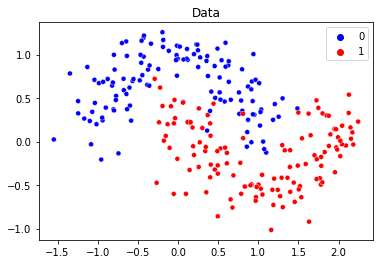

In [179]:
import pandas as pd
data1 = data_generation (250, 0.20, 0)

X = data1[0]
y = data1[1]
plot_moons(X, y)

In [180]:
# Split data with 70% to train and 30% to test

X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(y_test.shape)

(175, 2)
(75, 2)
(175,)
(75,)


## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [208]:
def initialize_model(input_layer, output_layer, activation_fonction, epoch_number):
    model= Sequential()

    model.add(layers.Dense(input_layer, input_dim = 2, activation= activation_fonction))
    model.add(layers.Dense(output_layer, activation= 'sigmoid'))

    # model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam')
    model.fit(X_train, Y_train, batch_size=32, epochs=epoch_number)
    model.summary()

    
    return model

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

le modèle à 21 paramètres (2*5 + 5*2 + biais)

You are now ready to train your algorithm on the training set:

In [209]:
model = initialize_model(5, 1, 'relu', 100)

Epoch 1/100
11/11 [==============================] - 1s 1ms/step - loss: 0.5663
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5586
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5512
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5441
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5369
Epoch 6/100
11/11 [==============================] - 0s 651us/step - loss: 0.5304
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5233
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5166
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5099
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5030
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4963
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4898
Epoch 13/100
11/11 [===============

 dense_24 (Dense)            (None, 5)                 15        
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [192]:
model.history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x27ae9e04e50>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.8568549752235413,
   0.845661997795105,
   0.8352741599082947,
   0.8242517113685608,
   0.8144311308860779,
   0.8053643703460693,
   0.796130895614624,
   0.7865322232246399,
   0.7786703109741211,
   0.7706570029258728,
   0.7631237506866455,
   0.7562685012817383,
   0.749396800994873,
   0.7424890995025635,
   0.7362264394760132,
   0.7298842668533325,
   0.7236366271972656,
   0.7179515361785889,
   0.7123324871063232,
   0.7067750692367554,
   0.7015196681022644,
   0.6962537169456482,
   0.6911519765853882,
   0.6861819624900818,
   0.681465744972229,
   0.6767458915710449,
   0.6722236275672913,
   0.6676396131515503,
   0.6637082099914551,
   0.6593531370162964,
   0.6552303433418274,
   0.6512526273727417,
   0.6473180055618286,
   0.6434423327445984,
   0.639775812625885,
   0.6358950138092041,
   0.6324

❓ Plot the history of the train loss using the following function

In [193]:
model.history.history

{'loss': [0.8568549752235413,
  0.845661997795105,
  0.8352741599082947,
  0.8242517113685608,
  0.8144311308860779,
  0.8053643703460693,
  0.796130895614624,
  0.7865322232246399,
  0.7786703109741211,
  0.7706570029258728,
  0.7631237506866455,
  0.7562685012817383,
  0.749396800994873,
  0.7424890995025635,
  0.7362264394760132,
  0.7298842668533325,
  0.7236366271972656,
  0.7179515361785889,
  0.7123324871063232,
  0.7067750692367554,
  0.7015196681022644,
  0.6962537169456482,
  0.6911519765853882,
  0.6861819624900818,
  0.681465744972229,
  0.6767458915710449,
  0.6722236275672913,
  0.6676396131515503,
  0.6637082099914551,
  0.6593531370162964,
  0.6552303433418274,
  0.6512526273727417,
  0.6473180055618286,
  0.6434423327445984,
  0.639775812625885,
  0.6358950138092041,
  0.6324807405471802,
  0.6285703182220459,
  0.6249039769172668,
  0.6216055750846863,
  0.6177078485488892,
  0.6140774488449097,
  0.6104904413223267,
  0.6068918704986572,
  0.6031658053398132,
  0.599

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [194]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 0s/step


You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [195]:
accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 0s/step - loss: 0.3948


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [196]:
accuracy

0.3947829306125641

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

20/20 [==============================] - 0s 2ms/step


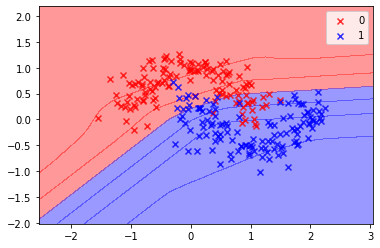

In [197]:
plot_decision_regions(X, y, model, test_idx=None, resolution=0.2)


## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [210]:
model2 = initialize_model(5, 1, 'relu', 500)


Epoch 1/500
11/11 [==============================] - 1s 2ms/step - loss: 0.7523
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7420
Epoch 3/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7315
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7215
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7114
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7011
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 8/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6801
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6694
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6587
Epoch 11/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6474
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6364
Epoch 13/500
11/11 [=================

11/11 [==============================] - 0s 2ms/step - loss: 0.2873
Epoch 103/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2867
Epoch 104/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2860
Epoch 105/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 106/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 107/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2843
Epoch 108/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2837
Epoch 109/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2831
Epoch 110/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2826
Epoch 111/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2820
Epoch 112/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 113/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 114/500
11/11 [=========

11/11 [==============================] - 0s 0s/step - loss: 0.2568
Epoch 203/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2566
Epoch 204/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2565
Epoch 205/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 206/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2562
Epoch 207/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2562
Epoch 208/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2559
Epoch 209/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2558
Epoch 210/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2556
Epoch 211/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2555
Epoch 212/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2554
Epoch 213/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2552
Epoch 214/500
11/11 [==========

11/11 [==============================] - 0s 2ms/step - loss: 0.2462
Epoch 303/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2461
Epoch 304/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 305/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 306/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2458
Epoch 307/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2458
Epoch 308/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2457
Epoch 309/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2457
Epoch 310/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2456
Epoch 311/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 312/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2455
Epoch 313/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2453
Epoch 314/500
11/11 [=========

11/11 [==============================] - 0s 2ms/step - loss: 0.2374
Epoch 403/500
11/11 [==============================] - 0s 0s/step - loss: 0.2372
Epoch 404/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2371
Epoch 405/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2371
Epoch 406/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 407/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2369
Epoch 408/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2369
Epoch 409/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2367
Epoch 410/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2366
Epoch 411/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2366
Epoch 412/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2364
Epoch 413/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2364
Epoch 414/500
11/11 [==========

 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 5)                 15        
                                                                 
 dense_27 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


❓ Did the test accuracy improve?

In [211]:
model2.history.__dict__
model2.history.history
y_pred2 = model2.predict(X_test)
accuracy2 = model2.evaluate(X_test, y_test)
accuracy2

5/5 [==============================] - 0s 2ms/step - loss: 0.3072


0.307241827249527

On effet, l'accuracy tend légérement + vers 0

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [215]:
model= Sequential()

model.add(layers.Dense(20, input_dim = 2, activation= "relu"))
model.add(layers.Dense(10, activation= "relu"))
model.add(layers.Dense(5, activation= "relu"))
model.add(layers.Dense(1, activation= 'sigmoid'))

❓ What is the number of parameters of your new model?

Le nouveau modèle comporte 331 paramètres

Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [216]:
# model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, Y_train, batch_size=32, epochs=500)
model.summary()


Epoch 1/500
11/11 [==============================] - 1s 2ms/step - loss: 0.7787
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7261
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6884
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6708
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6540
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6355
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6143
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 0.5924
Epoch 9/500
11/11 [==============================] - 0s 3ms/step - loss: 0.5710
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.5520
Epoch 11/500
11/11 [==============================] - 0s 2ms/step - loss: 0.5367
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 0.5232
Epoch 13/500
11/11 [=================

11/11 [==============================] - 0s 2ms/step - loss: 0.1383
Epoch 103/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1366
Epoch 104/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1340
Epoch 105/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1324
Epoch 106/500
11/11 [==============================] - 0s 651us/step - loss: 0.1307
Epoch 107/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1285
Epoch 108/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1269
Epoch 109/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1248
Epoch 110/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1229
Epoch 111/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1218
Epoch 112/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1203
Epoch 113/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 114/500
11/11 [=======

11/11 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 301/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 302/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 303/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 304/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 305/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 306/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 307/500
11/11 [==============================] - 0s 0s/step - loss: 0.0612
Epoch 308/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 309/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 310/500
11/11 [==============================] - 0s 0s/step - loss: 0.0616
Epoch 311/500
11/11 [==============================] - 0s 0s/step - loss: 0.0609
Epoch 312/500
11/11 [============

11/11 [==============================] - 0s 0s/step - loss: 0.0586
Epoch 401/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 402/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0574
Epoch 403/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 404/500
11/11 [==============================] - 0s 0s/step - loss: 0.0592
Epoch 405/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 406/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 407/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 408/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0580
Epoch 409/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 410/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0579
Epoch 411/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 412/500
11/11 [===========

Epoch 500/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0564
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 20)                60        
                                                                 
 dense_40 (Dense)            (None, 10)                210       
                                                                 
 dense_41 (Dense)            (None, 5)                 55        
                                                                 
 dense_42 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [217]:
model.history.__dict__
model.history.history
y_pred = model.predict(X_test)
accuracy_deep = model.evaluate(X_test, y_test)
accuracy_deep

5/5 [==============================] - 0s 0s/step - loss: 0.1130


0.11302586644887924

❓ Do you think we have overfitted on the noise? Check it out below

20/20 [==============================] - 0s 822us/step


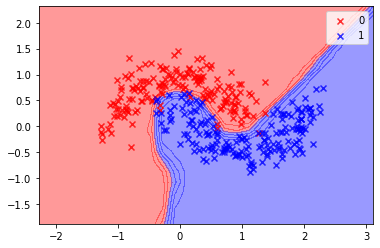

In [225]:
plot_decision_regions(X_train, Y_train, model, test_idx=None, resolution=0.2)

Je ne pense pas que le modèle soit overfité parce que la courbe délimite les demies-lunes correctement